# Comprehensive Scanned Doc Pre-processing

Scanned documents can have pages with wrong alignment, low contrast, low brightness and rotated upside down. This can create challenges while processing of documents using OCR, ICR, Text extraction, image-based ML/AI modelling, etc. 
This solution incorporates statistical models which identify angle of tilt based on textual orientation and position of text relative to page boundaries and corrects the alignment / tilt of the pages. It identifies the contrast between background and text in the pages of the scanned document and adjust the contrast of the low contrast pages. It also incorporates deep learning models which identify if a page is upside down. The models are trained on a large dataset of thousands of pages. This enables OCR/ICR engines to achieve higher accuracy and improves the subsequent text extraction pipelines.


### Prerequisite

The kernel comes pre-installed with the required packages. Else ensure to have the following Python Packages in your environment at minimum:

    - Sklearn
    - numpy
    - pandas
    - opencv
    - keras
    - tensorflow
   

 ### Contents

1. [Input Data](#Input-Format)
1. [Creating Model](#Creating-Model)
1. [Batch Transform](#Batch-Transform)
1. [Output](#Output)
1. [Invoking through Endpoint](#Invoking-through-Endpoint)

### Input Format


The solution works with scanned documents in formats - pdfs and images. The input documents must be zipped.




<b> Note: 
    Input file from sage_maker should be of the form pdfs and images.<br>Ensure Content-Type is 'application/zip'
</b>

### Input instructions

•The solution works with scanned documents in formats - pdfs and images. The input documents must be zipped.

•The input zip file can have up to 2 images [for types see below] or a scanned document in PDF format with maximum 2 pages.

•Also the image size must be less than 2 MB and PDF size must be less than 4 MB.

•Images can be of following types - bmp, dib, jpeg, jpg, jpe, png, pbm, pgm, ppm, tiff, tif .




### Output interpretation

• Output file will contain the corrected tilt, better contrast/ brightness and upright pages in images/ PDF.

• Output will be a zip file.


## Importing libraries for runtime

In [1]:
import pandas as pd
import boto3
import re

## Read the input file

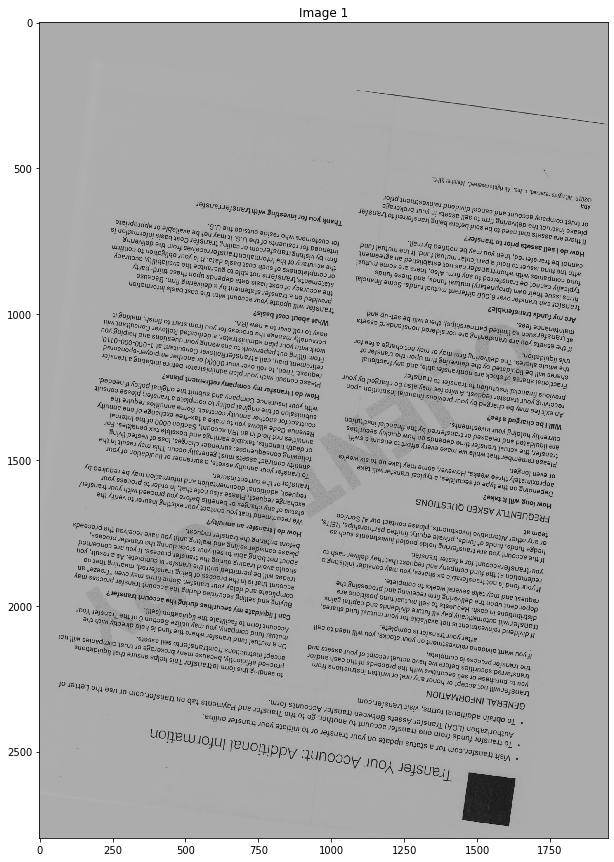

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('enhancement_input.png')


fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(25,15))

ax1.imshow(img1)
ax1.set_title("Image 1")


plt.show()


## Creating Model


In [5]:
model_package_arn = 'put your arn here'

In [4]:
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role

role = get_execution_role()
sagemaker_session = sage.Session()

In [5]:
model = ModelPackage(model_package_arn=model_package_arn,
                    role = role,
                    sagemaker_session = sagemaker_session)

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


## Batch Transform

Now that model is ready, we can deploy the model and make predictions.

### Prediction Classes - Batch Transform Job

<b>Output (zip) file will contain the corrected tilt, better contrast/ brightness and upright pages in images/ PDF.  </b>

In [6]:
import json 
import uuid


transformer = model.transformer(1, 'ml.m5.xlarge')
transformer.transform('s3://mphasis-marketplace/scanned_document_enhancement/enhancement_input_image.zip', content_type='application/zip')
transformer.wait()
#transformer.output_path
print("Batch Transform complete")
bucketFolder = transformer.output_path.rsplit('/')[3]

..........................2020-09-24T02:28:06.341:[sagemaker logs]: MaxConcurrentTransforms=1, MaxPayloadInMB=6, BatchStrategy=MULTI_RECORD
Using TensorFlow backend.
 * Serving Flask app "serve" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
169.254.255.130 - - [24/Sep/2020 02:28:06] "#033GET /ping HTTP/1.1#033" 200 -
169.254.255.130 - - [24/Sep/2020 02:28:06] "#033GET /execution-parameters HTTP/1.1#033" 404 -
2020-09-24 02:28:06.922755: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2020-09-24 02:28:06.922779: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2020-09-24 02:28:06.922797: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be runni

In [7]:
#print(s3bucket,s3prefix)
s3_conn = boto3.client("s3")
bucket_name="sagemaker-us-east-2-786796469737"
with open('enhancement_output.zip', 'wb') as f:
    s3_conn.download_fileobj(bucket_name, bucketFolder+'/enhancement_input_image.zip.out', f)
    print("Output file loaded from bucket")

Output file loaded from bucket


## Output

• The processed output is of the form zip file.
  
• Output (zip) file will contain the corrected tilt, better contrast/ brightness and upright pages in images/ PDF.

    

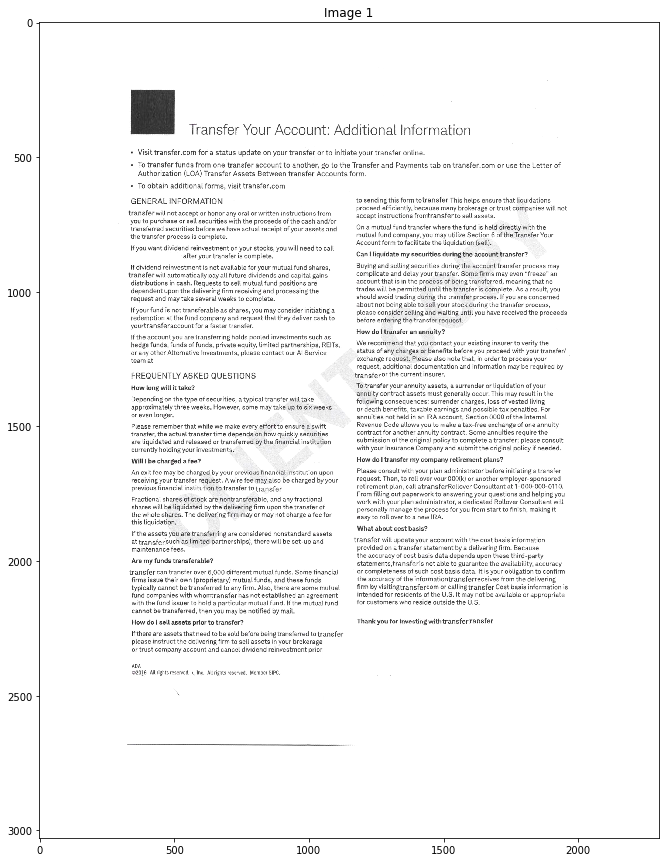

In [8]:
img1 = mpimg.imread('enhancement_output.png')

fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(25,15))

ax1.imshow(img1)
ax1.set_title("Image 1")

plt.show()

## Invoking through Endpoint

In [9]:
import json 
import uuid
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role
from sagemaker import ModelPackage
import boto3
from IPython.display import Image
from PIL import Image as ImageEdit

role = get_execution_role()

sagemaker_session = sage.Session()
bucket=sagemaker_session.default_bucket()

In [10]:
content_type='application/zip'
model_name='document-enhancement'
real_time_inference_instance_type='ml.m5.xlarge'

In [23]:
model_package_arn = 'put your arn here'

In [12]:
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role

role = get_execution_role()
sagemaker_session = sage.Session()

In [13]:
#Define predictor wrapper class
def predict_wrapper(endpoint, session):
    return sage.RealTimePredictor(endpoint, session,content_type=content_type)
#create a deployable model from the model package.
model = ModelPackage(role=role,
                    model_package_arn=model_package_arn,
                    sagemaker_session=sagemaker_session,
                    predictor_cls=predict_wrapper)

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


In [14]:
predictor = model.deploy(1, real_time_inference_instance_type, endpoint_name=model_name)

-------------!

### Invoking endpoint result through CLI command

In [15]:
file_name="enhancement_input_file.zip"

In [16]:
!aws sagemaker-runtime invoke-endpoint --endpoint-name $model_name --body fileb://$file_name --content-type 'application/zip' --region us-east-2 enhancement_output_file.zip

{
    "ContentType": "application/zip",
    "InvokedProductionVariant": "AllTraffic"
}


In [19]:
#predictor.delete_endpoint()